<a href="https://colab.research.google.com/github/blaze-fire/Job_a_thon_June_2022/blob/main/job_a_thon.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!git clone https://github.com/blaze-fire/Job_a_thon_June_2022.git

Cloning into 'Job_a_thon_June_2022'...
remote: Enumerating objects: 46, done.
remote: Counting objects: 100% (46/46), done.
remote: Compressing objects: 100% (36/36), done.
remote: Total 46 (delta 10), reused 37 (delta 7), pack-reused 0
Unpacking objects: 100% (46/46), done.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [2]:
path='/Job_a_thon_June_2022'

In [3]:
df = pd.read_csv(os.getcwd()+path+'/data/train_wn75k28.csv')

In [4]:
# df.drop('id', axis=1, inplace=True)
df.head()

,id,created_at,campaign_var_1,campaign_var_2,products_purchased,signup_date,user_activity_var_1,user_activity_var_2,user_activity_var_3,user_activity_var_4,user_activity_var_5,user_activity_var_6,user_activity_var_7,user_activity_var_8,user_activity_var_9,user_activity_var_10,user_activity_var_11,user_activity_var_12,buy
0,1,2021-01-01,1,2,2.0,2020-09-24,0,0,0,0,0,0,1,1,0,0,0,0,0
1,2,2021-01-01,2,1,2.0,2020-09-19,1,0,1,0,0,0,1,0,0,0,0,0,0
2,3,2021-01-01,9,3,3.0,2021-08-11,1,0,0,0,0,0,0,0,0,0,0,0,0
3,4,2021-01-01,6,7,2.0,2017-10-04,0,0,0,0,0,0,0,0,0,0,0,0,0
4,5,2021-01-01,4,6,NaN,2020-06-08,0,0,0,0,0,0,1,0,0,0,1,0,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39161 entries, 0 to 39160
Data columns (total 19 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    39161 non-null  int64  
 1   created_at            39161 non-null  object 
 2   campaign_var_1        39161 non-null  int64  
 3   campaign_var_2        39161 non-null  int64  
 4   products_purchased    18250 non-null  float64
 5   signup_date           24048 non-null  object 
 6   user_activity_var_1   39161 non-null  int64  
 7   user_activity_var_2   39161 non-null  int64  
 8   user_activity_var_3   39161 non-null  int64  
 9   user_activity_var_4   39161 non-null  int64  
 10  user_activity_var_5   39161 non-null  int64  
 11  user_activity_var_6   39161 non-null  int64  
 12  user_activity_var_7   39161 non-null  int64  
 13  user_activity_var_8   39161 non-null  int64  
 14  user_activity_var_9   39161 non-null  int64  
 15  user_activity_var_1

In [6]:
# Name of Day of week
df['created_at_day_of_week'] = pd.to_datetime(df['created_at']).dt.day_name()
# df['signup_date_day_of_week'] = pd.to_datetime(df['signup_date']).dt.day_name()

In [7]:
# Day of week
df['created_at_dow'] = pd.to_datetime(df['created_at']).dt.dayofweek
# df['signup_date_dow'] = pd.to_datetime(df['signup_date']).dt.dayofweek

In [8]:
#isweekwnd

df['created_at_isWeekwnd'] = np.where(df['created_at_day_of_week'].isin(['Sunday', 'Saturday']), 1, 0)
# df['signup_date_dow_isWeekwnd'] = np.where(df['signup_date_day_of_week'].isin(['Sunday', 'Saturday']), 1, 0)

In [9]:
#week of year

df['created_at_dateWeek'] = pd.to_datetime(df['created_at']).dt.isocalendar().week.astype(np.int8)
# df['signup_date_dow_dateWeek'] = pd.to_datetime(df['signup_date']).dt.isocalendar().week.apply(lambda x: np.int8(x) if pd.notnull(x) else np.nan)

In [10]:
# quarter of year

df['created_at_quarter'] = pd.to_datetime(df['created_at']).dt.quarter
# df['signup_date_dow_quarter'] = pd.to_datetime(df['signup_date']).dt.quarter

In [11]:
# days between user signed up and the lead was dropped 

# df['lead_dropped_Minus_signup_date_Days'] = (pd.to_datetime(df['created_at']) - pd.to_datetime(df['signup_date'])).dt.days

In [12]:
# months between user signed up and the lead was dropped

# df['lead_dropped_Minus_signup_date_Months'] = np.round((pd.to_datetime(df['created_at']) - pd.to_datetime(df['signup_date']))/np.timedelta64(1,'M'), 0)

<b>Cyclic Feature Encoding</b> <br>
<p>
Data that has a unique set of values that repeat in a cycle are known as cyclic data. Time-related features are mainly cyclic in nature. For example, months of a year, days of a week, hours of time, minutes of time etc... These features have a set of values and all the observations will have a value from this set only. In many ML problems, we encounter such features. Handling such features properly have proved to help in the improvement of accuracy.
</p>

Post: https://stackoverflow.com/a/70485603

In [13]:
def encode(data, col, max_val):
    data[col + '_sin'] = data[col].apply(lambda x: np.round(np.sin(2 * np.pi * float(x)/max_val), 5) if pd.notnull(x) else x)
    data[col + '_cos'] = data[col].apply(lambda x: np.round(np.cos(2 * np.pi * float(x)/max_val), 5) if pd.notnull(x) else x)
    data.drop(col, axis=1, inplace=True)
    return data

In [14]:
# extract month 

df['created_at_month'] = pd.to_datetime(df['created_at']).dt.month
# df['signup_date_month'] = pd.to_datetime(df['signup_date']).dt.month

In [15]:
# extract day

df['created_at_date'] = pd.to_datetime(df['created_at']).dt.day
# df['signup_date_date'] = pd.to_datetime(df['signup_date']).dt.day

In [16]:
# get year of signup of the user for created_at column the year is constant
# df['signup_year'] = pd.to_datetime(df['signup_date']).dt.year

In [17]:
df = encode(df, 'created_at_month', 12)
# df = encode(df, 'signup_date_month', 12)

In [18]:
df = encode(df, 'created_at_date', 31)
# df = encode(df, 'signup_date_date', 31)

In [19]:
df.drop(['created_at', 'signup_date', 'id'], axis=1, inplace=True)

In [20]:
df.head()

,campaign_var_1,campaign_var_2,products_purchased,user_activity_var_1,user_activity_var_2,user_activity_var_3,user_activity_var_4,user_activity_var_5,user_activity_var_6,user_activity_var_7,...,buy,created_at_day_of_week,created_at_dow,created_at_isWeekwnd,created_at_dateWeek,created_at_quarter,created_at_month_sin,created_at_month_cos,created_at_date_sin,created_at_date_cos
0,1,2,2.0,0,0,0,0,0,0,1,...,0,Friday,4,0,53,1,0.5,0.86603,0.2013,0.97953
1,2,1,2.0,1,0,1,0,0,0,1,...,0,Friday,4,0,53,1,0.5,0.86603,0.2013,0.97953
2,9,3,3.0,1,0,0,0,0,0,0,...,0,Friday,4,0,53,1,0.5,0.86603,0.2013,0.97953
3,6,7,2.0,0,0,0,0,0,0,0,...,0,Friday,4,0,53,1,0.5,0.86603,0.2013,0.97953
4,4,6,NaN,0,0,0,0,0,0,1,...,0,Friday,4,0,53,1,0.5,0.86603,0.2013,0.97953


## fill missing values

In [ ]:
df.isnull().sum()

created_at                    0
campaign_var_1                0
campaign_var_2                0
products_purchased        20911
signup_date               15113
user_activity_var_1           0
user_activity_var_2           0
user_activity_var_3           0
user_activity_var_4           0
user_activity_var_5           0
user_activity_var_6           0
user_activity_var_7           0
user_activity_var_8           0
user_activity_var_9           0
user_activity_var_10          0
user_activity_var_11          0
user_activity_var_12          0
buy                           0
created_at_day_of_week        0
created_at_dow                0
created_at_isWeekwnd          0
created_at_dateWeek           0
created_at_quarter            0
signup_date_month         15113
signup_date_date          15113
signup_year               15113
created_at_month_sin          0
created_at_month_cos          0
created_at_date_sin           0
created_at_date_cos           0
dtype: int64

In [ ]:
df_prods_purchased = df.select_dtypes(exclude='object').drop(['signup_year', 'signup_date_date', 'signup_date_month','buy'], axis=1)

In [ ]:
df_prods_purchased.isnull().sum()

campaign_var_1              0
campaign_var_2              0
products_purchased      20911
user_activity_var_1         0
user_activity_var_2         0
user_activity_var_3         0
user_activity_var_4         0
user_activity_var_5         0
user_activity_var_6         0
user_activity_var_7         0
user_activity_var_8         0
user_activity_var_9         0
user_activity_var_10        0
user_activity_var_11        0
user_activity_var_12        0
created_at_dow              0
created_at_isWeekwnd        0
created_at_dateWeek         0
created_at_quarter          0
created_at_month_sin        0
created_at_month_cos        0
created_at_date_sin         0
created_at_date_cos         0
dtype: int64

In [ ]:
X_train = df_prods_purchased[~df_prods_purchased['products_purchased'].isnull()].drop(['products_purchased'], axis=1)
y_train = df_prods_purchased[~df_prods_purchased['products_purchased'].isnull()]['products_purchased'].astype(np.int8)

In [ ]:
X_test =  df[df['products_purchased'].isnull()].select_dtypes(exclude='object').drop(['signup_year', 'signup_date_date', 'signup_date_month', 'products_purchased', 'buy'], axis=1)

In [ ]:
X_train.head()

,campaign_var_1,campaign_var_2,user_activity_var_1,user_activity_var_2,user_activity_var_3,user_activity_var_4,user_activity_var_5,user_activity_var_6,user_activity_var_7,user_activity_var_8,...,user_activity_var_11,user_activity_var_12,created_at_dow,created_at_isWeekwnd,created_at_dateWeek,created_at_quarter,created_at_month_sin,created_at_month_cos,created_at_date_sin,created_at_date_cos
0,1,2,0,0,0,0,0,0,1,1,...,0,0,4,0,53,1,0.5,0.86603,0.2013,0.97953
1,2,1,1,0,1,0,0,0,1,0,...,0,0,4,0,53,1,0.5,0.86603,0.2013,0.97953
2,9,3,1,0,0,0,0,0,0,0,...,0,0,4,0,53,1,0.5,0.86603,0.2013,0.97953
3,6,7,0,0,0,0,0,0,0,0,...,0,0,4,0,53,1,0.5,0.86603,0.2013,0.97953
5,3,4,0,0,0,0,0,1,0,0,...,0,0,4,0,53,1,0.5,0.86603,0.2013,0.97953


In [ ]:
from imblearn.over_sampling import SMOTE
oversample = SMOTE(sampling_strategy='auto')
X_train_balanced, y_train_balanced = oversample.fit_resample(X_train, y_train)

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

y_train_balanced = le.fit_transform(y_train_balanced)

In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'learning_rate': np.arange(0.06, 0.09, 0.01),
    'n_estimators': np.arange(101, 110),
}

grid_search = GridSearchCV(XGBClassifier(n_estimators=108, learning_rate = 0.06,max_depth=3, verbose=5, tree_method = 'gpu_hist'), param_grid, scoring='f1_macro', cv=5, verbose=5)
grid_search.fit(X_train, y_train)

grid_search.best_score_
grid_search.best_params_


In [ ]:
from xgboost import XGBClassifier
xgbClfBest = XGBClassifier(n_estimators=108, learning_rate = 0.06,max_depth=3, verbose=5)
xgbClfBest.fit(X_train_balanced, y_train_balanced)
pred = le.inverse_transform(xgbClfBest.predict(X_test))

[22:09:59] WARNING: ../src/learner.cc:627: 
Parameters: { "verbose" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




In [ ]:
X_test['products_purchased'] = pred
X_train['products_purchased'] = y_train

In [ ]:
final_df_prod_purchased = pd.concat([X_train, X_test], axis=0)
final_df_prod_purchased.reset_index(inplace=True)
final_df_prod_purchased.sort_values(by='index', inplace=True)
final_df_prod_purchased.drop('index', axis=1, inplace=True)
final_df_prod_purchased.reset_index(drop=True, inplace=True)

In [ ]:
df['products_purchased'] = final_df_prod_purchased['products_purchased']

In [ ]:
df.head()

,created_at,campaign_var_1,campaign_var_2,products_purchased,signup_date,user_activity_var_1,user_activity_var_2,user_activity_var_3,user_activity_var_4,user_activity_var_5,...,created_at_isWeekwnd,created_at_dateWeek,created_at_quarter,signup_date_month,signup_date_date,signup_year,created_at_month_sin,created_at_month_cos,created_at_date_sin,created_at_date_cos
0,2021-01-01,1,2,2,2020-09-24,0,0,0,0,0,...,0,53,1,9.0,24.0,2020.0,0.5,0.86603,0.2013,0.97953
1,2021-01-01,2,1,2,2020-09-19,1,0,1,0,0,...,0,53,1,9.0,19.0,2020.0,0.5,0.86603,0.2013,0.97953
2,2021-01-01,9,3,3,2021-08-11,1,0,0,0,0,...,0,53,1,8.0,11.0,2021.0,0.5,0.86603,0.2013,0.97953
3,2021-01-01,6,7,2,2017-10-04,0,0,0,0,0,...,0,53,1,10.0,4.0,2017.0,0.5,0.86603,0.2013,0.97953
4,2021-01-01,4,6,2,2020-06-08,0,0,0,0,0,...,0,53,1,6.0,8.0,2020.0,0.5,0.86603,0.2013,0.97953





## Missing signup date






In [ ]:
df.isnull().sum()

created_at              0
campaign_var_1          0
campaign_var_2          0
products_purchased      0
signup_date             0
user_activity_var_1     0
user_activity_var_2     0
user_activity_var_3     0
user_activity_var_4     0
user_activity_var_5     0
user_activity_var_6     0
user_activity_var_7     0
user_activity_var_8     0
user_activity_var_9     0
user_activity_var_10    0
user_activity_var_11    0
user_activity_var_12    0
buy                     0
dtype: int64

In [ ]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
imp = IterativeImputer(max_iter=10, random_state=0)

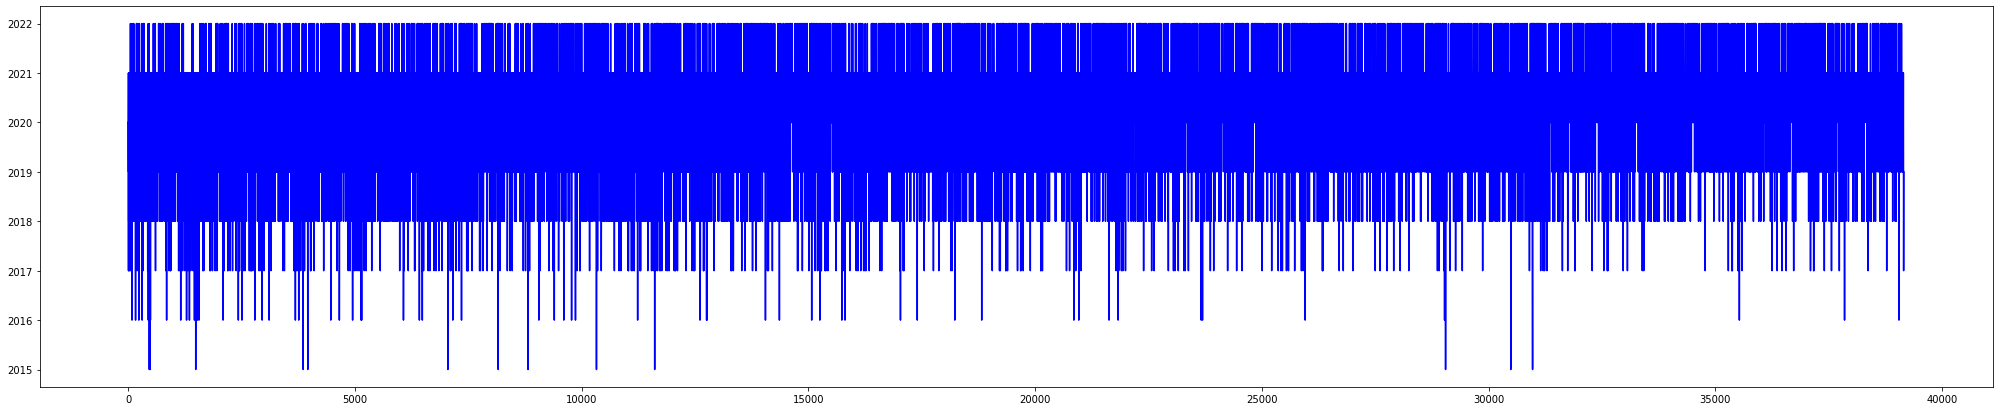

In [ ]:
plt.rcParams['figure.figsize']=(35,7)
plt.plot(df['signup_year'].interpolate(option='spline'), color='blue')
plt.show()

In [ ]:
df['year'] = np.int16(np.round(df['signup_year'].interpolate(option='spline'), 0))
df['month'] = np.int8(np.round(df['signup_date_month'].interpolate(option='spline'), 0))
df['day'] = np.int8(np.round(df['signup_date_date'].interpolate(option='spline'), 0))

In [ ]:
# pd.to_datetime((df['year']*10000+df['month']*100+df['day']).astype('int'), format='%Y%m%d')

y = np.array(df['year']-1970, dtype='<M8[Y]')
m = np.array(df['month']-1, dtype='<m8[M]')
d = np.array(df['day']-1, dtype='<m8[D]')

df['signup_date'] = pd.Series(y+m+d)

## test dataset

In [ ]:
test_df = pd.read_csv(os.getcwd()+'/data/test.csv')

In [ ]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13184 entries, 0 to 13183
Data columns (total 39 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   id                                     13184 non-null  int64  
 1   created_at                             13184 non-null  object 
 2   campaign_var_1                         13184 non-null  int64  
 3   campaign_var_2                         13184 non-null  int64  
 4   products_purchased                     13184 non-null  float64
 5   signup_date                            13184 non-null  object 
 6   user_activity_var_1                    13184 non-null  int64  
 7   user_activity_var_2                    13184 non-null  int64  
 8   user_activity_var_3                    13184 non-null  int64  
 9   user_activity_var_4                    13184 non-null  int64  
 10  user_activity_var_5                    13184 non-null  int64  
 11  us

In [ ]:
test_df.isnull().sum()

id                                       0
created_at                               0
campaign_var_1                           0
campaign_var_2                           0
products_purchased                       0
signup_date                              0
user_activity_var_1                      0
user_activity_var_2                      0
user_activity_var_3                      0
user_activity_var_4                      0
user_activity_var_5                      0
user_activity_var_6                      0
user_activity_var_7                      0
user_activity_var_8                      0
user_activity_var_9                      0
user_activity_var_10                     0
user_activity_var_11                     0
user_activity_var_12                     0
created_at_day_of_week                   0
created_at_dow                           0
created_at_isWeekwnd                     0
created_at_dateWeek                      0
created_at_quarter                       0
created_at_

In [ ]:
# test_df['signup_date_month'] = pd.to_datetime(test_df['signup_date']).dt.month
# test_df['signup_date_date'] = pd.to_datetime(test_df['signup_date']).dt.day
# test_df['signup_year'] = pd.to_datetime(test_df['signup_date']).dt.year

# test_df['year'] = np.int16(np.round(test_df['signup_year'].interpolate(option='spline'), 0))
# test_df['month'] = np.int8(np.round(test_df['signup_date_month'].interpolate(option='spline'), 0))
# test_df['day'] = np.int8(np.round(test_df['signup_date_date'].interpolate(option='spline'), 0))

# # pd.to_datetime((df['year']*10000+df['month']*100+df['day']).astype('int'), format='%Y%m%d')

# y = np.array(test_df['year']-1970, dtype='<M8[Y]')
# m = np.array(test_df['month']-1, dtype='<m8[M]')
# d = np.array(test_df['day']-1, dtype='<m8[D]')

# test_df['signup_date'] = pd.Series(y+m+d)
# test_df['signup_date'] = test_df['signup_date']

In [ ]:
def preprocess(df):
    df['created_at_day_of_week'] = pd.to_datetime(df['created_at']).dt.day_name()
    df['created_at_dow'] = pd.to_datetime(df['created_at']).dt.dayofweek
    df['created_at_isWeekwnd'] = np.where(df['created_at_day_of_week'].isin(['Sunday', 'Saturday']), 1, 0)
    df['created_at_dateWeek'] = pd.to_datetime(df['created_at']).dt.isocalendar().week.astype(np.int8)
    df['created_at_quarter'] = pd.to_datetime(df['created_at']).dt.quarter
    df['created_at_month'] = pd.to_datetime(df['created_at']).dt.month
    df['created_at_date'] = pd.to_datetime(df['created_at']).dt.day
    df = encode(df, 'created_at_month', 12)
    df = encode(df, 'created_at_date', 31)
    
    
    df['signup_date_month'] = pd.to_datetime(df['signup_date']).dt.month
    df['signup_date_date'] = pd.to_datetime(df['signup_date']).dt.day
    df['signup_year'] = pd.to_datetime(df['signup_date']).dt.year
    df = encode(df, 'signup_date_month', 12)
    df = encode(df, 'signup_date_date', 31)
    df['signup_date_dow'] = pd.to_datetime(df['signup_date']).dt.dayofweek
    df['signup_date_day_of_week'] = pd.to_datetime(df['signup_date']).dt.day_name()
    df['lead_dropped_Minus_signup_date_Months'] = np.round((pd.to_datetime(df['created_at']) - pd.to_datetime(df['signup_date']))/np.timedelta64(1,'M'), 0)
    df['lead_dropped_Minus_signup_date_Days'] = (pd.to_datetime(df['created_at']) - pd.to_datetime(df['signup_date'])).dt.days
    df['signup_date_dow_quarter'] = pd.to_datetime(df['signup_date']).dt.quarter
    df['signup_date_dow_dateWeek'] = pd.to_datetime(df['signup_date']).dt.isocalendar().week
    df['signup_date_dow_isWeekwnd'] = np.where(df['signup_date_day_of_week'].isin(['Sunday', 'Saturday']), 1, 0)
    
    return df

In [ ]:
# test_df = preprocess(test_df)

In [ ]:
def missing_products(df, model):
    df_prods_purchased = df[~df['products_purchased'].isnull()]
    X_train = df_prods_purchased.select_dtypes(exclude='object').drop(['products_purchased'], axis=1)
    y_train = df_prods_purchased['products_purchased']
    X_test =  df[df['products_purchased'].isnull()].select_dtypes(exclude='object').drop(['products_purchased'], axis=1)

    pred = model.predict(X_test)

    X_test['products_purchased'] = pred
    X_train['products_purchased'] = y_train

    final_df_prod_purchased = pd.concat([X_train, X_test], axis=0)
    final_df_prod_purchased.reset_index(inplace=True)
    final_df_prod_purchased.sort_values(by='index', inplace=True)
    final_df_prod_purchased.drop('index', axis=1, inplace=True)
    final_df_prod_purchased.reset_index(drop=True, inplace=True)
    df['products_purchased'] = final_df_prod_purchased['products_purchased']

    return df

In [ ]:
# ids = test_df['id']
# test_df = missing_products(test_df.drop('id', axis=1), xgbClfBest)
# test_df = pd.concat([ids, test_df], axis=1) 

In [ ]:
# test_df.to_csv(os.getcwd()+'/data/test.csv', index=False)

## Prepare for training

In [21]:
X = df.select_dtypes(exclude='object').drop(['buy'], axis=1)
y = df['buy']

In [22]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0, stratify=y)

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0, stratify=y)

## LGBM Oversampling

In [ ]:
from imblearn.over_sampling import BorderlineSMOTE, SMOTE, KMeansSMOTE, SVMSMOTE, ADASYN
from imblearn.combine import SMOTEENN, SMOTETomek

In [ ]:
samplers = [SMOTE(random_state=0), SMOTEENN(random_state=0), SMOTETomek(random_state=0), BorderlineSMOTE(random_state=0), KMeansSMOTE(random_state=0), SVMSMOTE(random_state=0), ADASYN(random_state=0)]

from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
from lightgbm import LGBMClassifier
for sampler in samplers:
    print(type(sampler), '\n')
    X_sampled, y_sampled = oversample.fit_resample(X, y)
    X_train, X_test, y_train, y_test = train_test_split(X_sampled, y_sampled, test_size=0.25, random_state=0)
    lgbmclf = LGBMClassifier(random_state=0)
    lgbmclf.fit(X_train, y_train)
    preds = lgbmclf.predict(X_test)
    print(f1_score(y_test, preds), '\n\n')

<class 'imblearn.over_sampling._smote.base.SMOTE'> 

0.9852656485265648 


<class 'imblearn.combine._smote_enn.SMOTEENN'> 

0.9847311827956989 


<class 'imblearn.combine._smote_tomek.SMOTETomek'> 

0.9853281023270811 


<class 'imblearn.over_sampling._smote.filter.BorderlineSMOTE'> 

0.9848321858864028 


<class 'imblearn.over_sampling._smote.cluster.KMeansSMOTE'> 

0.9851644807568266 


<class 'imblearn.over_sampling._smote.filter.SVMSMOTE'> 

0.9849429984942999 


<class 'imblearn.over_sampling._adasyn.ADASYN'> 

0.9854387190371285 




## Making Predictions

In [56]:
test_df = pd.read_csv(os.getcwd()+path+'/data/test.csv')
X_test_df = test_df.select_dtypes(exclude='object').drop('id', axis=1)

In [ ]:
sampler = ADASYN(random_state=0)
X_sampled, y_sampled = oversample.fit_resample(X, y)
lgbmclf = LGBMClassifier(random_state=0)
lgbmclf.fit(X_sampled, y_sampled)
preds = lgbmclf.predict(X_test_df)

In [ ]:
lgbmclf = LGBMClassifier(random_state=0)
lgbmclf.fit(X.select_dtypes(exclude = 'object'), y)
preds = catboostClf.predict(X_test_df)

In [ ]:
sub = {
    'id': test_df['id'],
    'buy': preds
}

In [ ]:
sub_df = pd.DataFrame(sub)

In [ ]:
sub_df.to_csv(os.getcwd()+'/submissions/lgbmclfEntireDataset.csv', index=False)

## Catboost

In [ ]:
!pip install catboost

In [25]:
from catboost import CatBoostClassifier

In [61]:
catboostClf = CatBoostClassifier(eval_metric='F1', iterations=5000)

In [ ]:
catboostClf.fit(X.select_dtypes(exclude = 'object'), y)

In [63]:
preds = catboostClf.predict(X_test_df)

In [64]:
sub = {
    'id': test_df['id'],
    'buy': preds
}

In [65]:
sub_df = pd.DataFrame(sub)

In [66]:
sub_df.to_csv('catboost_5000.csv', index=False)

## grid search

In [27]:
from sklearn.model_selection import GridSearchCV

In [49]:
param_grid = {
    'iterations': [2000],
    'learning_rate': [0.001],
    # 'depth': [5, 6]
}

In [50]:
grid_search = GridSearchCV(CatBoostClassifier(eval_metric='F1', task_type="GPU"), param_grid, scoring='f1', verbose=2, cv=3)

In [ ]:
grid_search.fit(X.select_dtypes(exclude = 'object'), y)

In [53]:
grid_search.best_params_

{'iterations': 2000, 'learning_rate': 0.001}

In [58]:
estimator = grid_search.best_estimator_

In [ ]:
estimator.fit(X.select_dtypes(exclude = 'object'), y)

In [60]:
preds = estimator.predict(test_df.select_dtypes(exclude='object').drop('id', axis=1))
sub = pd.DataFrame({'id':test_df['id'], 'buy': preds})
sub.to_csv(f'Catboost_sub.csv', index=False)

# Deep Learning

In [21]:
!pip install scikeras[tensorflow]

In [22]:
import keras
import tensorflow as tf
import keras.backend as K
from scikeras.wrappers import KerasClassifier

In [23]:
def get_f1(y_true, y_pred): #taken from old keras source code
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    recall = true_positives / (possible_positives + K.epsilon())
    f1_val = 2*(precision*recall)/(precision+recall+K.epsilon())
    return f1_val

In [71]:
params = {
    "hidden_layer_dim": [50, 100, 200],
    'optimizer__learning_rate': [0.001],
    'momentum': [0.0, 0.2, 0.4, 0.6, 0.8, 0.9],
    'optimizer': ['Adagrad', 'Adam'],
    'activation': ['softmax', 'relu', 'sigmoid', 'linear']
}

In [88]:
from keras import callbacks
def get_model():
    # note that meta is a special argument that will be
    # handed a dict containing input metadata

    model = keras.models.Sequential()
    model.add(keras.layers.Input(shape = (34,)))
    model.add(keras.layers.Activation("relu"))
    model.add(keras.layers.Dense(50))
    model.add(keras.layers.Activation("relu"))
    model.add(keras.layers.Dense(50))
    model.add(keras.layers.Activation("relu"))
    model.add(keras.layers.Dense(50))
    model.add(keras.layers.Activation("relu"))
    model.add(keras.layers.Dense(50))
    model.add(keras.layers.Activation("relu"))
    model.add(keras.layers.Dense(50))
    model.add(keras.layers.Activation("relu"))
    model.add(keras.layers.Dense(50))
    model.add(keras.layers.Activation("relu"))
    model.add(keras.layers.Dense(50))
    model.add(keras.layers.Activation("relu"))
    model.add(keras.layers.Dense(1))
    model.add(keras.layers.Activation("sigmoid"))
    model.compile(loss='binary_crossentropy', 
              optimizer=tf.keras.optimizers.Adam(
                                                  learning_rate=0.001,
                                                  beta_1=0.91,
                                                  beta_2=0.99,
                                                  epsilon=1e-06,
                                                  amsgrad=False,
                                                  name="Adam",
              ), 
              metrics=[get_f1])
    return model

In [89]:
model = KerasClassifier(get_model, loss='binary_crossentropy', epochs=30)
# gs = GridSearchCV(model, params, refit=False, cv=5, scoring='f1')

# gs.fit(X.select_dtypes(exclude = 'object'), y)

In [ ]:
history = model.fit(X.select_dtypes(exclude = 'object'), y)

# Making Predictions

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39161 entries, 0 to 39160
Data columns (total 25 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   campaign_var_1          39161 non-null  int64  
 1   campaign_var_2          39161 non-null  int64  
 2   products_purchased      18250 non-null  float64
 3   user_activity_var_1     39161 non-null  int64  
 4   user_activity_var_2     39161 non-null  int64  
 5   user_activity_var_3     39161 non-null  int64  
 6   user_activity_var_4     39161 non-null  int64  
 7   user_activity_var_5     39161 non-null  int64  
 8   user_activity_var_6     39161 non-null  int64  
 9   user_activity_var_7     39161 non-null  int64  
 10  user_activity_var_8     39161 non-null  int64  
 11  user_activity_var_9     39161 non-null  int64  
 12  user_activity_var_10    39161 non-null  int64  
 13  user_activity_var_11    39161 non-null  int64  
 14  user_activity_var_12    39161 non-null

In [25]:
df['products_purchased'] = df['products_purchased'].astype('category')

In [26]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
#encode all the cat features

df['products_purchased'] = encoder.fit_transform(df['products_purchased'])

In [27]:
from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import StandardScaler
pt = PowerTransformer()
scaler = StandardScaler()

In [28]:
X = df.select_dtypes(exclude='object').drop('buy', axis=1)
y = df['buy']

In [29]:
from sklearn.model_selection import train_test_split

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2)

In [31]:
X_train = pt.fit_transform(X_train)
X_test = pt.transform(X_test)

#apply the scaling

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [32]:
from sklearn.decomposition import PCA
num_components = np.arange(5, 24)
#check the total explained variance ratio using different number of principal components 
for comp in num_components:
    pca = PCA(n_components=comp)
    X_train_pca = pca.fit_transform(X_train)
    print('Total Explained Variance Ratio using {} components = {}'.format(comp,np.sum(pca.explained_variance_ratio_)))

Total Explained Variance Ratio using 5 components = 0.38041614186537254
Total Explained Variance Ratio using 6 components = 0.4300305731702748
Total Explained Variance Ratio using 7 components = 0.4757635459361382
Total Explained Variance Ratio using 8 components = 0.5212955718470068
Total Explained Variance Ratio using 9 components = 0.5654053349427381
Total Explained Variance Ratio using 10 components = 0.6094081356157601
Total Explained Variance Ratio using 11 components = 0.6528375812769873
Total Explained Variance Ratio using 12 components = 0.6958119758583964
Total Explained Variance Ratio using 13 components = 0.7380368883948696
Total Explained Variance Ratio using 14 components = 0.7793642139258377
Total Explained Variance Ratio using 15 components = 0.819814212310962
Total Explained Variance Ratio using 16 components = 0.8591458762081912
Total Explained Variance Ratio using 17 components = 0.897135542897149
Total Explained Variance Ratio using 18 components = 0.930879769897086

In [33]:
#import the required tensorflow keras libraries
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from tensorflow.keras.callbacks import EarlyStopping

In [34]:
def create_model(optimizer='adam',init='glorot_uniform',dropout=0.0):
    model = keras.models.Sequential()
    #add the layers
    model.add(keras.layers.Dense(units=500,input_dim=X_train.shape[1],activation='relu',kernel_initializer=init))
    model.add(keras.layers.Dense(units=300,activation='relu',kernel_initializer=init))
    model.add(keras.layers.Dropout(dropout))
    model.add(keras.layers.Dense(units=100,activation='relu',kernel_initializer=init))
    model.add(keras.layers.Dropout(dropout))
    model.add(keras.layers.Dense(units=50,activation='relu',kernel_initializer=init))
    model.add(keras.layers.Dropout(dropout))
    model.add(keras.layers.Dense(units=1,activation='sigmoid',kernel_initializer=init))
    #compile the model
    model.compile(loss='binary_crossentropy',optimizer=optimizer,metrics=[get_f1])
    #return the model
    return model

In [35]:
#define the early stop criteria
early_stop = EarlyStopping(monitor='val_loss',patience=10,restore_best_weights=True)
#create the model
model = KerasClassifier(build_fn=create_model,epochs=100,batch_size=16,verbose=0)

In [36]:
model = create_model(optimizer='adam',dropout=0.25)
history = model.fit(X_train,y_train,epochs=100,callbacks=[early_stop],validation_data=(X_test,y_test),
          verbose=2)

Epoch 1/100
979/979 - 9s - loss: 0.1291 - get_f1: 0.3816 - val_loss: 0.1026 - val_get_f1: 0.4426 - 9s/epoch - 9ms/step
Epoch 2/100
979/979 - 3s - loss: 0.1122 - get_f1: 0.4050 - val_loss: 0.1002 - val_get_f1: 0.4363 - 3s/epoch - 3ms/step
Epoch 3/100
979/979 - 3s - loss: 0.1088 - get_f1: 0.4251 - val_loss: 0.1025 - val_get_f1: 0.4520 - 3s/epoch - 3ms/step
Epoch 4/100
979/979 - 2s - loss: 0.1079 - get_f1: 0.4124 - val_loss: 0.1004 - val_get_f1: 0.4395 - 2s/epoch - 3ms/step
Epoch 5/100
979/979 - 3s - loss: 0.1053 - get_f1: 0.4254 - val_loss: 0.1018 - val_get_f1: 0.4270 - 3s/epoch - 3ms/step
Epoch 6/100
979/979 - 2s - loss: 0.1048 - get_f1: 0.4224 - val_loss: 0.1014 - val_get_f1: 0.4351 - 2s/epoch - 2ms/step
Epoch 7/100
979/979 - 3s - loss: 0.1036 - get_f1: 0.4160 - val_loss: 0.1008 - val_get_f1: 0.4384 - 3s/epoch - 3ms/step
Epoch 8/100
979/979 - 2s - loss: 0.1015 - get_f1: 0.4229 - val_loss: 0.0988 - val_get_f1: 0.4400 - 2s/epoch - 2ms/step
Epoch 9/100
979/979 - 3s - loss: 0.1000 - get_f1